Link to GitHub repo: https://github.com/halayaghi-git/ML_assignment1.git

USING AI FOR SOME COMMENTS WITHIN CODE TO CLARIFY

Task 1: Data Loading and Initial Exploration

In [1]:
import pandas as pd

df = pd.read_csv('titanic3.csv')

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


- Performing EDA 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


- Descriptive Statistics

In [3]:
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


- Shape

In [4]:
print(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns\n")


Dataset Shape: 1310 rows and 14 columns



- Data types, numerical/categorical

In [5]:
print("Data Types:")
print(df.dtypes)
print("\n")

Data Types:
pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object




In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


- Visualizing (to get a better understanding of the statistical data)

In [7]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Since the data is not normally distributed, I will use the boxplot to understand the outliers. I determined that it is not normally distributed because the data the median is not the same as the mean (not symmetric).

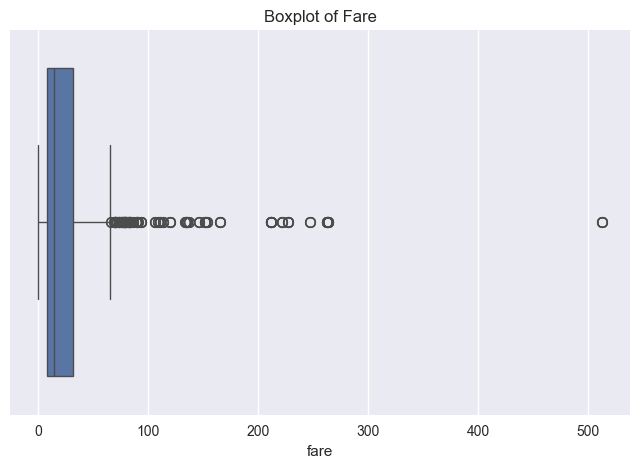

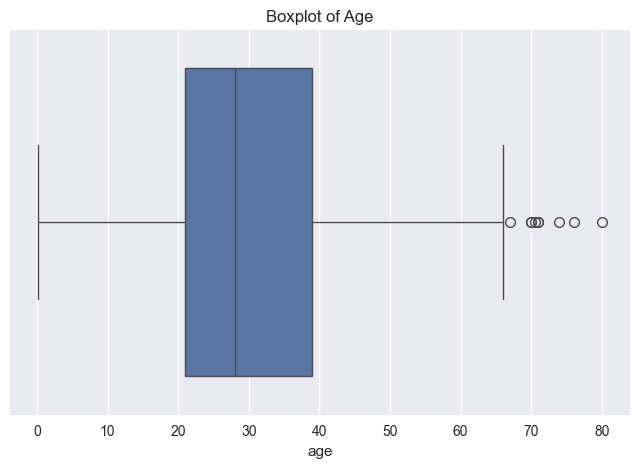

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')  

df = pd.read_csv('titanic3.csv') 

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fare"])
plt.title("Boxplot of Fare")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age")
plt.show()

According to the outputs of the boxplot:
Fare: The boxplot is right skewed, and this tells us that there are some outliers in the data.
Age: The boxplot is left skewed, and this tells us that there are some outliers in the data.

TASK 2: Managing Missing Values

In [9]:
missing_values = df.isnull().sum() 

missing_values = missing_values[missing_values > 0] 

print(missing_values)


pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


1. Replace with mean, age is continuous, and fare only has a few missing values. Another method that I couldve used is removing the rows with missing values since theyre only a ew but I chose to replace with mean since theyre both continuous features.

In [10]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

C:\Users\halay\AppData\Local\Temp\ipykernel_20744\883390424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\halay\AppData\Local\Temp\ipykernel_20744\883390424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

2. Replacing with -1, or unknown to avoid assumpptions, or fill in missign patters (for home for ex.), -1 for numerical and unknown for categorical. For these feautures, I chose this method because I cannot make assumptions. Also, replacing with -1 and unknown shows the model taht there are abnormal in place of the missing values.

In [11]:
df['sex'].fillna("Unknown", inplace=True)
df['cabin'].fillna("Unknown", inplace=True)
df['boat'].fillna(-1, inplace=True)
df['body'].fillna(-1, inplace=True)
df['home.dest'].fillna("Unknown", inplace=True)

C:\Users\halay\AppData\Local\Temp\ipykernel_20744\1475066345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna("Unknown", inplace=True)
C:\Users\halay\AppData\Local\Temp\ipykernel_20744\1475066345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

3. Replacing with most frequent value since it only has a few missing values and is categorical, I used 'mode' because its the most probable 

In [12]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

C:\Users\halay\AppData\Local\Temp\ipykernel_20744\1964997694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


4. Removing rows with very few missing values (as it will have no major difference because im not removing too much relevant data)

In [13]:
df.dropna(subset=['pclass', 'survived', 'name', 'sibsp', 'parch', 'ticket'], inplace=True)

- The dataset without missing values

In [14]:
df.to_csv("titanic_new.csv", index=False)


In [15]:
import pandas as pd
df = pd.read_csv('titanic_new.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,-1.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,-1.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,-1,-1.0,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,-1,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,-1,-1.0,"Montreal, PQ / Chesterville, ON"


TASK 3: Encoding Categorical Variables

In [16]:
import sys
print(sys.executable)

c:\Users\halay\OneDrive\Documents\Database\venv\Scripts\python.exe


In [17]:
from sklearn.preprocessing import OneHotEncoder

- Identifying the categorical variables

In [18]:
categorical_vars = df.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_vars)

Categorical variables: Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')


In [19]:
print("Number of unique values in each categorical variable:")

for column in ['sex', 'embarked', 'cabin', 'ticket', 'boat', 'home.dest', 'name']:
    n_unique = df[column].nunique()
    print(f"{column}: {n_unique} unique values")
    
    if n_unique < 10:  
        print("\nValue distribution:")
        print(df[column].value_counts())
    else:
        print(f"\nToo many values to display ({n_unique} unique values)")

Number of unique values in each categorical variable:
sex: 2 unique values

Value distribution:
sex
male      843
female    466
Name: count, dtype: int64
embarked: 3 unique values

Value distribution:
embarked
S    916
C    270
Q    123
Name: count, dtype: int64
cabin: 187 unique values

Too many values to display (187 unique values)
ticket: 929 unique values

Too many values to display (929 unique values)
boat: 28 unique values

Too many values to display (28 unique values)
home.dest: 370 unique values

Too many values to display (370 unique values)
name: 1307 unique values

Too many values to display (1307 unique values)


In [20]:
# separate code for home.dest because output above was too long
print("Value distribution of home.dest\n")

total_rows = len(df)
missing_values = df['home.dest'].isna().sum()
unique_values = df['home.dest'].nunique()

print(f"Total number of rows: {total_rows}")
print(f"Number of missing values: {missing_values}")
print(f"Number of unique destinations: {unique_values}")
print(f"Percentage of missing values: {(missing_values/total_rows)*100:.2f}%\n")

Value distribution of home.dest

Total number of rows: 1309
Number of missing values: 0
Number of unique destinations: 370
Percentage of missing values: 0.00%



I decided to drop the features, name, ticket, and home.dest, as they have too many values and encoding them would result in high dimensionality which could affect the model negatively and it would be hard to interpret results, and I think that they dont have an impact on predicting the survival of the passesngers.

- Encoding

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# as each value in the feature column 'cabin' starts with a letter (which I assumed is the deck), I decided to extract the deck and use that for encoding
df['deck'] = df['cabin'].str[0]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

columns_to_encode = ['sex', 'deck', 'embarked']

X = df[columns_to_encode]

encoded_data = encoder.fit_transform(X)

feature_names = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(
    encoded_data,
    columns=feature_names,
    index=df.index
)

numerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived']
final_df = pd.concat([df[numerical_features], encoded_df], axis=1)

print("Original shape:", df.shape)
print("Encoded shape:", final_df.shape)

print("\nEncoded features:")
for column in encoded_df.columns:
    print(column)

print(encoded_df.head())

final_df.to_csv('titanic_encoded.csv', index=False)


print("\nEncoding Summary:")
print("Categories for each feature:")
for i, feature in enumerate(columns_to_encode):
    print(f"\n{feature}:")
    print(encoder.categories_[i])

Original shape: (1309, 15)
Encoded shape: (1309, 20)

Encoded features:
sex_female
sex_male
deck_A
deck_B
deck_C
deck_D
deck_E
deck_F
deck_G
deck_T
deck_U
embarked_C
embarked_Q
embarked_S
   sex_female  sex_male  deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  \
0         1.0       0.0     0.0     1.0     0.0     0.0     0.0     0.0   
1         0.0       1.0     0.0     0.0     1.0     0.0     0.0     0.0   
2         1.0       0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3         0.0       1.0     0.0     0.0     1.0     0.0     0.0     0.0   
4         1.0       0.0     0.0     0.0     1.0     0.0     0.0     0.0   

   deck_G  deck_T  deck_U  embarked_C  embarked_Q  embarked_S  
0     0.0     0.0     0.0         0.0         0.0         1.0  
1     0.0     0.0     0.0         0.0         0.0         1.0  
2     0.0     0.0     0.0         0.0         0.0         1.0  
3     0.0     0.0     0.0         0.0         0.0         1.0  
4     0.0     0.0     0.0         0.0    

TASK 4

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your encoded data
df = pd.read_csv('titanic_encoded.csv')

# All numerical features
numerical_features = ['age', 'fare', 'pclass', 'sibsp', 'parch']

# Create copy for scaling
df_scaled = df.copy()

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standardize 'age' and 'fare'
df_scaled[['age', 'fare']] = standard_scaler.fit_transform(df[numerical_features][['age', 'fare']])

# Normalize 'pclass', 'sibsp', and 'parch'
df_scaled[['pclass', 'sibsp', 'parch']] = minmax_scaler.fit_transform(df[numerical_features][['pclass', 'sibsp', 'parch']])

# Save the scaled dataset
df_scaled.to_csv('titanic_scaled.csv', index=False)

# Print comparison of original and scaled data
print("Original vs Scaled Data:\n")
print("Original data statistics:")
print(df[numerical_features].describe())
print("\nScaled data statistics:")
print(df_scaled[numerical_features].describe())

Original vs Scaled Data:

Original data statistics:
               age         fare       pclass        sibsp        parch
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000
mean     29.881135    33.295479     2.294882     0.498854     0.385027
std      12.883199    51.738879     0.837836     1.041658     0.865560
min       0.166700     0.000000     1.000000     0.000000     0.000000
25%      22.000000     7.895800     2.000000     0.000000     0.000000
50%      29.881135    14.454200     3.000000     0.000000     0.000000
75%      35.000000    31.275000     3.000000     1.000000     0.000000
max      80.000000   512.329200     3.000000     8.000000     9.000000

Scaled data statistics:
                age          fare       pclass        sibsp        parch
count  1.309000e+03  1.309000e+03  1309.000000  1309.000000  1309.000000
mean   1.519878e-16  4.342507e-17     0.647441     0.062357     0.042781
std    1.000382e+00  1.000382e+00     0.418918     0.130207     0

Difference between Standardization and Normalization and their importance

Normalization: is converting an actual numerical range of values into a predefined and artificial range of values (usually in the interval [0,1] or [-1,1]). Since Normalization uses a rnage it compresses feature values (including outliers) in the range, so if the outliers are too different from the rest of the data this can affect the new normalized data.
I decide to normalize the discrete features: 'pclass', 'sibsp' and 'fare'. 

Standardization: is a procedure to center the data to have a mean of 0 and it scales it to have a standard deviation of 1, this results in the feature values having properties of a standatrd normal distribution.
I decided to stardaize the continuous features: 'age', and 'fare'

Normalization tends to work better for uniformly distributed data, but in this case they are not however scaling still helps to improve the data which overall improves the model's performance. Whereas, Standardization tends to work bets for normally distributed data, according to the boxplot performed above they are ruight skewed but close to normal.. 

We use feature scaling to increase the training speed of models and to ensure that features are not dominating others especially in gradient descent as large feature slow down training and this results in a better ML model with better, faster, and more accurate output.

TASK 5

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('titanic_scaled.csv')

df = df.dropna(subset=['survived'])

X = df.drop('survived', axis=1)
y = df['survived']


X_train, X_temp, y_train, y_temp = train_test_split( # Splitting the dataset into training and temporary sets (temp) for further splitting into validation and test sets
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("\nDataset splits:")
print(f"Full dataset: {len(X)} samples")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print("\nSurvival distribution:")
print("\nFull dataset:")
print(y.value_counts(normalize=True))
print("\nTraining set:")
print(y_train.value_counts(normalize=True))
print("\nValidation set:")
print(y_val.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))

X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Dataset splits:
Full dataset: 1309 samples
Training set: 916 samples (70.0%)
Validation set: 196 samples (15.0%)
Test set: 197 samples (15.0%)

Survival distribution:

Full dataset:
survived
0.0    0.618029
1.0    0.381971
Name: proportion, dtype: float64

Training set:
survived
0.0    0.617904
1.0    0.382096
Name: proportion, dtype: float64

Validation set:
survived
0.0    0.617347
1.0    0.382653
Name: proportion, dtype: float64

Test set:
survived
0.0    0.619289
1.0    0.380711
Name: proportion, dtype: float64


After observing the train_test_split method you provided, I folllowed a similar approach to split my data. I first split the data into two parts, x for everything except the 'survived' feature, and y for only the 'survived feature. I did 70 percent for training and 30 percent which was then split into two, so 15 percent for validation and 15 percent for test. I also used stratify to ensure that both split were fair in terms of the amounts of survived/not survived.

It is usually better practice to do scaling after splitting the dataset to avoid data leakage, but in this case for this model i followed the task order of the assignment. 

TASK 6

In [2]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
import pandas as pd
import numpy as np

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_train = X_train.fillna(X_train.mean())

print("\nOriginal class distribution:")
print(sorted(Counter(y_train['survived']).items()))

X_smote, y_smote = SMOTE(random_state=42).fit_resample(X_train, y_train['survived'])
print("\nAfter SMOTE:")
print(sorted(Counter(y_smote).items()))

X_adasyn, y_adasyn = ADASYN(random_state=42).fit_resample(X_train, y_train['survived'])
print("\nAfter ADASYN:")
print(sorted(Counter(y_adasyn).items()))

pd.DataFrame(X_smote, columns=X_train.columns).to_csv('X_train_smote.csv', index=False)
pd.DataFrame(y_smote, columns=['survived']).to_csv('y_train_smote.csv', index=False)
pd.DataFrame(X_adasyn, columns=X_train.columns).to_csv('X_train_adasyn.csv', index=False)
pd.DataFrame(y_adasyn, columns=['survived']).to_csv('y_train_adasyn.csv', index=False)


Original class distribution:
[(0.0, 566), (1.0, 350)]

After SMOTE:
[(0.0, 566), (1.0, 566)]

After ADASYN:
[(0.0, 566), (1.0, 560)]


SMOTE: creates more values of the minority class by first identifying the minority class then plotting them against the other features, this balances the dataset to make the model less biased towards the majority class
ADASYN: creates more values of the minority class but its a bit more specific as it identifies the areas where they minority class and where they are surrounded by the majority class, so it specifies where the new values are needed the most.

In this case, the majority class is not survived, and minority class is survived.

Originally the dataset was imbalanced, with more not survivors (566) than survivors (350). After applying SMOTE, the dataset became perfectly balanced (566 each) by generating synthetic survivor samples. ADASYN also increased the number of survivors but stopped at 560, so it generated only as many samples as needed to improve balance.
Before: The dataset is imbalanced (one class has significantly more samples).
After: The dataset is balanced, so the model won't be biased toward the majority class.

TASK 7

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your encoded data
df = pd.read_csv('titanic_encoded.csv')

# Split features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Check for NaN values in target variable
if y.isnull().any():
    print("NaN values found in target variable. Dropping NaNs.")
    X = X[y.notna()]
    y = y.dropna()  # Drop NaN values from target

# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

# Handle NaN values in features using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with mean
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Calculate and print feature variances
variances = X_train_imputed.var()
print("\nFeature variances:")
for feature, var in variances.items():
    print(f"{feature}: {var:.4f}")

# Identify and remove low variance features
var_threshold = 0.01  
selector = VarianceThreshold(threshold=var_threshold)
X_train_var = pd.DataFrame(selector.fit_transform(X_train_imputed), 
                            columns=X_train_imputed.columns[selector.get_support()])

# Print low variance features
low_variance_features = X_train_imputed.columns[~selector.get_support()].tolist()
print(f"\nLow variance features: {low_variance_features}")

# Initialize Random Forest Classifier for Boruta
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Boruta
boruta_selector = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    random_state=42,
    verbose=2,
    two_step=True
)

# Fit Boruta
boruta_selector.fit(X_train_var.values, y_train.values)

# Get selected features
selected_features = X_train_var.columns[boruta_selector.support_].tolist()
print(f"\nSelected features by Boruta: {selected_features}")

# Create final training set with selected features
X_train_final = X_train_var[selected_features]

# Create validation and test sets with selected features
X_val_final = X_val_imputed[selected_features]
X_test_final = X_test_imputed[selected_features]

# Identify and remove highly correlated features
correlation_matrix = X_train_final.corr()
corr_threshold = 0.8  
high_corr_features = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            corr = correlation_matrix.iloc[i, j]
            print(f"High correlation: {colname_i} & {colname_j}: {corr:.2f}")
            high_corr_features.append((colname_i, colname_j, corr))

# Remove one feature from each pair of highly correlated features
features_to_drop = set()
for feat1, feat2, corr in high_corr_features:
    features_to_drop.add(feat2)  # Drop the second feature in the pair

# Final features after removing low variance and highly correlated features
final_features = [f for f in selected_features if f not in features_to_drop]
print(f"\nFinal features after removing low variance and high correlation: {final_features}")

# Create final training, validation, and test sets with selected features
X_train_final = X_train_final[final_features]
X_val_final = X_val_final[final_features]
X_test_final = X_test_final[final_features]

# Save processed datasets
X_train_final.to_csv('X_train_processed_boruta.csv', index=False)
X_val_final.to_csv('X_val_processed_boruta.csv', index=False)
X_test_final.to_csv('X_test_processed_boruta.csv', index=False)

# Save the target variables for training, validation, and test sets
y_train.to_csv('y_train_processed.csv', index=False)
y_val.to_csv('y_val_processed.csv', index=False)
y_test.to_csv('y_test_processed.csv', index=False)


Feature variances:
pclass: 0.7004
age: 163.2581
sibsp: 1.1026
parch: 0.7995
fare: 2681.6799
sex_female: 0.2287
sex_male: 0.2287
deck_A: 0.0160
deck_B: 0.0472
deck_C: 0.0666
deck_D: 0.0377
deck_E: 0.0242
deck_F: 0.0160
deck_G: 0.0048
deck_T: 0.0010
deck_U: 0.1737
embarked_C: 0.1599
embarked_Q: 0.0865
embarked_S: 0.2082

Low variance features: ['deck_G', 'deck_T']
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	13
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	13
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	13
Iteration: 	1

After finding the variance and identifying high correlation features, Boruta chose the following features: 'age', 'fare', and 'sex_male'. The continuous features 'age' and 'fare' have high variances of 163.2581 and 2681.6799 which means that there is a significant range of age and fare prices. The features 'deck_G' and 'deck_T' were eliminated as they had low variances of 0.0048 and 0.0010 and this tells me that they aren't very significant in the dataset. As for high correlation feautures, 'sex_female' and 'sex_male' we perfectly correlated (-1), and even though they showed high correlation Boruta still decided that they are significant in the dataset so Boruta chose one of them 'sex_male', because if one of them is there we can still represent gender because they are binary features. Other features such as 'pclass', 'sibsp', and 'parch' were still eliminated even though the variance isn't very low because Boruta can decide features that are importance in the dataset that have a significant impact on the model.

I addressed class imbalance and did feature selection after splitting the dataset due to the following. Firstly, it helps to prevent data leakage, because the model can be 'too trained' if we split after handling imbalances as it can include information from the validation and test sets in the training set. And this applies to feature selection, so if i did that before splitting my model will perform well on the training data, but it might not with data that it hasn't seen before. In addition, if i did tasks 6 and 7 before splitting, that would change the distribution of my data, and this would change the distribuyion of my validation and test sets and that would lead to data leakgfae because it would do oversampling (creating/adding values) from the validation and test sets. So overall, splitting before handling imbalances maintains the integrity of the validation and test sets which leads to a less biased model.

TASK 8

Validation Accuracy: 0.7634

Confusion Matrix:
[[61 11]
 [20 39]]


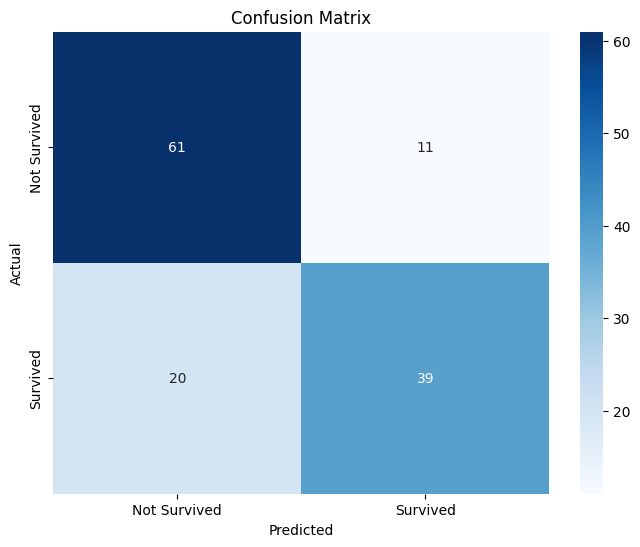

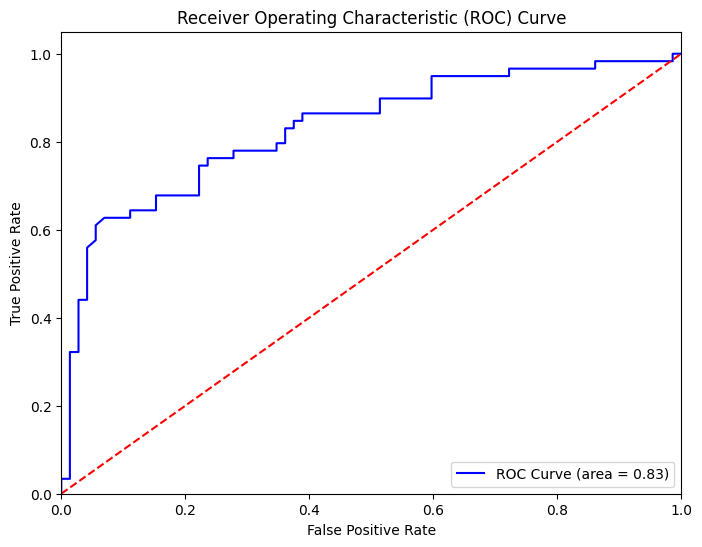

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed datasets
X_train_final = pd.read_csv('X_train_processed_boruta.csv')
y_train = pd.read_csv('y_train_processed.csv')['survived']  # Assuming 'survived' is the target variable
X_val_final = pd.read_csv('X_val_processed_boruta.csv')
y_val = pd.read_csv('y_val_processed.csv')['survived']  # Assuming 'survived' is the target variable

# Initialize and train logistic regression model
lr_model = LogisticRegression(random_state=42, C=1, penalty='l2', solver='liblinear', class_weight='balanced')

# Fit the model
lr_model.fit(X_train_final, y_train)

# Make predictions on validation set
val_predictions = lr_model.predict(X_val_final)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Confusion matrix
y_val_prob = lr_model.predict_proba(X_val_final)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()